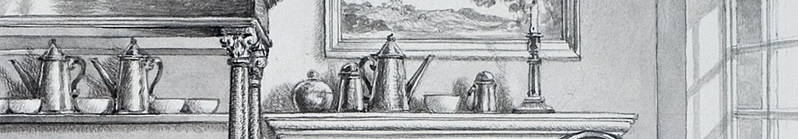

# Indeed Job Scrape
### Media and Journalism & Communication Studies Combined Master's Degree

This notebook collects and analyzes the job postings from Indeed.com that require a Master's Degree and are related to five concepts:
- __Communication__
- __Media__
- __Advocacy__
- __International Communication__
- __Protest__ (a red herring)

I've built this notebook to explore the conversations from the committee meetings and easily probe other ideas. New query terms can easily be added to test other wordings, categories, or perspectives.

Technical details are discussed later, but essentially, the code chunks below build a URL to relevant job posts on [Indeed.com](https://www.indeed.com/about).

Indeed is more than a jobs website--it is a hiring platform, resume repository, and job board. Because of this breadth and the fact that job posts are free (with limits), it is an ideal source of a wide variety of jobs.

However, the data is helpful beyond searching for a job. By providing a snapshot of the current market, Indeed job posts can serve as a thermometer for keywords and terms, a sounding board for new ideas and concepts, and a guide for in-demand skills.

Once the data is collected, the output is made up of two parts.

1. __Job titles from the relevant postings.__ Job titles are helpful as a _heuristic_ method of seeing if a search is returning appropriate opportunities for students from our program.

Sometimes a concept immediately returns job titles that are heuristically relevant. The number of jobs returned is a signal of market demand. The job titles can be assessed for surface-level relevancy.

However, job titles alone do not mean a concept is hitting the mark. Seemingly-relevant job titles may actually be for positions that our students are ill-prepared for. Conversely, jobs that seem far afield may actually rely on skills that fall withing the program's learning outcomes.

2. __Job descriptions from relevant posts.__ Posts include more information about the job and the required and preferred qualifications. This is a _systematic_ method of investigating job posts.

Reviewing all available job descriptions is impossible; there are simply too many available. If someone were able to review all __relevant__ job posts, they would get a wonderful sense of the market. So, the core problem is to find and supply relelvant jobs for a more detailed review.

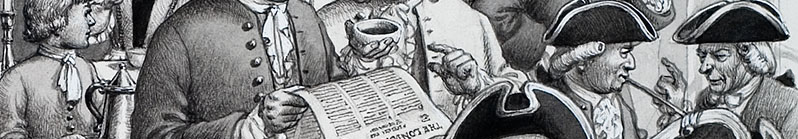

As much as possible is automated in this process, but this analysis is a computational ethnography ([Elish & boyd, 2017](https://www.tandfonline.com/doi/full/10.1080/03637751.2017.1375130)). The minor adjustments to the algorithm are decisions, made by a person with biases, that alter the results. As much as possible is done to recognize these biases and 


To analyze these outputs, visual summaries like wordclouds, word frequency charts, and bigrams are created. These exploratory methods look at aggregate data to recognize patterns and paths to follow. To follow a path is to dive deeper into selected job posts, noting observations, themes, and ultimately making judgments about whether that job fits an ambiguous categorization of relevancy. This is an iterative-cyclical process of collecting, heuristic sorting, systematic evaluation, adjustment of the algorithm, and recollection.

It is machine-aided learning with the goal to answer two questions.
1. What jobs are available for master's degree graduates from the proposed identities?
2. Which proposed identities align with relevant skill requirements for jobs?

### A request from Indeed is made up of __four__ components.

__First__ is the _query_ where keywords are used to select job posts. How exactly Indeed finds jobs that meet the query is a proprietary algorithm, but a common method is to check if the keywords are included in the text from job posts, titles, and post metadata stored in the database. Matching cases are then returned and presented.

In this context, I've decided the mention of a master's degree in the job post is a requirement, so those words are included in all queries.

__Second__ is the geographic _location_ and search _range_ for job posts. Cities and states are passed to Indeed along with a radius in miles. All job posts include a location, but some opportunities are reposted in multiple locations. For this analysis, I've decided to pull data from several major cities in the Midwest and East Coast and set a radius of 100 miles. There is an overlap in these ranges, so another process is required to filter out duplicate posts.

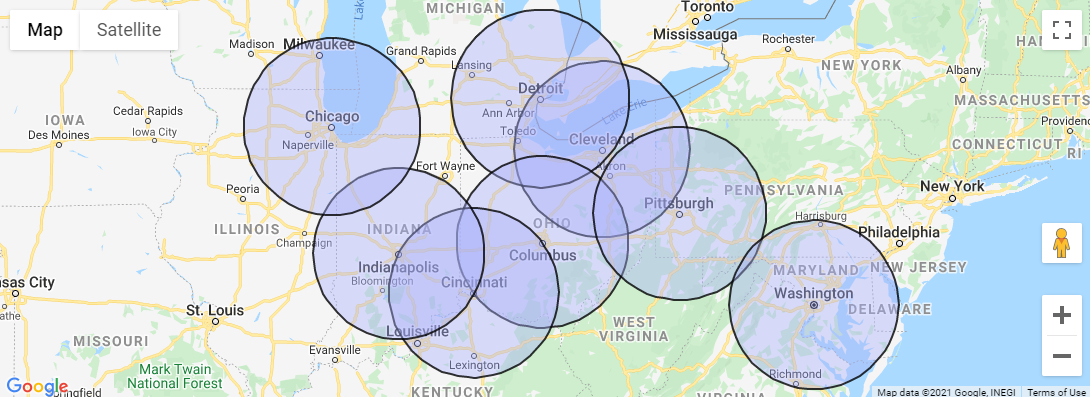
[_Geographic search ranges_](https://www.mapdevelopers.com/draw-circle-tool.php?circles=%5B%5B160934%2C41.5051613%2C-81.6934446%2C%22%23A7B0FA%22%2C%22%23000000%22%2C0.4%5D%2C%5B160934%2C42.3315509%2C-83.0466403%2C%22%23A7B0FA%22%2C%22%23000000%22%2C0.4%5D%2C%5B160934%2C39.9622601%2C-83.0007065%2C%22%23A7B0FA%22%2C%22%23000000%22%2C0.4%5D%2C%5B160934%2C40.4416941%2C-79.9900861%2C%22%23A7B0FA%22%2C%22%23000000%22%2C0.4%5D%2C%5B160934%2C39.1014537%2C-84.5124602%2C%22%23A7B0FA%22%2C%22%23000000%22%2C0.4%5D%2C%5B160934%2C39.7683331%2C-86.1583502%2C%22%23A7B0FA%22%2C%22%23000000%22%2C0.4%5D%2C%5B160934%2C38.8950368%2C-77.0365427%2C%22%23A7B0FA%22%2C%22%23000000%22%2C0.4%5D%2C%5B160934%2C41.8755616%2C-87.6244212%2C%22%23A7B0FA%22%2C%22%23000000%22%2C0.4%5D%5D)

__Third__ are the _exclusion_ keywords and terms that remove results from the returned data. These keywords along with the query create inclusion and exclusion criteria. While the inclusion criteria was selected from the committee discussions, the exclusion criteria is defined through an iterative approach of pulling some data, using a heuristic judgment of job titles, and then excluding common irrelevant jobs.

__Fourth__ and finally, there are a handful of _parameters_ that make the data more complete and easier to work with. These parameters are options from the [Indeed Advanced Job Search](https://www.indeed.com/advanced_search) that are applied to our requests for data. These options are set to return 50 job posts per request (instead of 10) ordered by date posted starting with the most recent. The data also only includes fulltime job offers that are not posted by a third-party of staff agency. Lastly, we request that Indeed not automatically remove what it considers duplicate posts as we will do that ourselves.

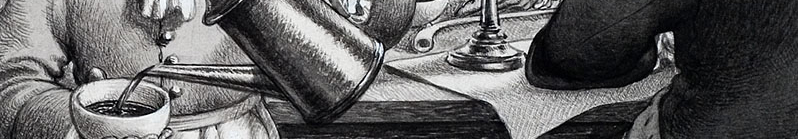


__To collect data, several functions are defined to:__
- Stitch together the four components of a request to build a list or URLs
- Make a series of requests to Indeed.com
- Parse the data to extract variables of interest

The returned dataset is then ready for heuristic and systematic analysis to further tune the query and exclusions. Importantly, the `indeed_scrape()` function is set up in a way that allows others to hack and play with the data collection and analysis.

### Now for some coding. Feel free to skip down to _Results_.
#### Data Collection
First thing, setting up the environment with pre-built tools that will help collect and analyze the data.

In [1]:
import requests
import urllib
from bs4 import BeautifulSoup
import time
import pandas as pd
pd.options.mode.chained_assignment = None

To get location data, the place names need to be converted to URL encoding (also called percent-encoding).

In [2]:
locations = [urllib.parse.quote(x) for x in ['Cleveland, OH', 'Detroit, MI', 'Columbus, OH', 'Pittsburgh, PA', 'Cincinnati, OH', 'Indianapolis, IN', 'Washington DC', 'Chicago, IL']]
locations

['Cleveland%2C%20OH',
 'Detroit%2C%20MI',
 'Columbus%2C%20OH',
 'Pittsburgh%2C%20PA',
 'Cincinnati%2C%20OH',
 'Indianapolis%2C%20IN',
 'Washington%20DC',
 'Chicago%2C%20IL']

Because multiple locations cannot be queried at once, the code must iterate over the list of cities and pull multiple pages. The `create_urls()` function combines the query, exclusions, locations, and parameters to create a list of working URLs.

In [3]:
def create_urls(query, exclusion, city_list, num_pages):
    urls = []
    stem = 'https://www.indeed.com/jobs?q='
    query = 'Master%27s+Degree+{}'.format(query)
    exclusions = '&as_not={}'.format(exclusion)
    #for testing, limit = 10; change to 50 when running
    params = '&radius=100&jt=fulltime&sr=directhire&sort=date&filter=0&fromage=any&limit=10&psf=advsrch&from=advancedsearch'
    for c in city_list:
        location = '&l={}'.format(c)
        for s in range(0, 10*num_pages, 10):
            start = '&start={}'.format(s)
            url = stem+query+exclusions+location+params+start
            urls.append(url)
    return urls

In [4]:
create_urls('communication', 'faculty', locations[0:2], 1)

['https://www.indeed.com/jobs?q=Master%27s+Degree+communication&as_not=faculty&l=Cleveland%2C%20OH&radius=100&jt=fulltime&sr=directhire&sort=date&filter=0&fromage=any&limit=10&psf=advsrch&from=advancedsearch&start=0',
 'https://www.indeed.com/jobs?q=Master%27s+Degree+communication&as_not=faculty&l=Detroit%2C%20MI&radius=100&jt=fulltime&sr=directhire&sort=date&filter=0&fromage=any&limit=10&psf=advsrch&from=advancedsearch&start=0']

Once we have the URLs `get_post_description()` and `get_post_data()` parse the HTML from the page to pull out the job title, company name, link to the full description, and location. At the same time, the full description page is pulled and the job description text is collected.

In [5]:
def get_post_description(post_url):
    desc_page = requests.get(str(post_url))
    desc_soup = BeautifulSoup(desc_page.text, 'html.parser')
    description = [x.text.strip() for x in desc_soup.find_all(name='div', attrs={'id':'jobDescriptionText'})]
    return description

In [6]:
def get_post_data(page):
    soup = BeautifulSoup(page.text, 'html.parser')
    job_title = [x.text.strip() for x in soup.find_all(name='a', attrs={'data-tn-element':'jobTitle'})]
    company = [x.text.strip() for x in soup.find_all(name='span', attrs={'class': 'company'})]
    link = ['https://www.indeed.com'+x['href'] for x in soup.find_all(name='a', attrs={'data-tn-element':'jobTitle'})]
    job_location = [x['data-rc-loc'] for x in soup.find_all(name='div', attrs={'class':'recJobLoc'})]
    description = [get_post_description(x) for x in link]
    dat = pd.DataFrame({'job_title':job_title, 'company':company, 'link':link, 'job_location':job_location, 'description': description})
    return dat

The `call_data()` and `collect_data()` functions make GET requests from the URL while checking to make sure the page parsing isn't throwing any errors.

In [7]:
def call_data(url):
    page = requests.get(url)
    return page

In [8]:
def collect_data(urls):
    data = pd.DataFrame()
    for url in urls:
        try:
            page  = call_data(url)
            data_chunk = get_post_data(page)
            data = data.append(data_chunk)
            time.sleep(1)
        except:
            print("Something wrong in collect_data()")
            data = pd.DataFrame({'job_title':['NaN'], 'company':['NaN'], 'link':['NaN'], 'job_location':['NaN'], 'description': ['NaN']})
    return data

Finally, `indeed_scraper()` accepts the query and exclusion arguments and pieces together the data returned from `get_post_data()`. The final dataset is a pandas DataFrame with columns for the variables collected.

In [9]:
def indeed_scraper(query, exclusions):
    data = pd.DataFrame()
    #For testing, only the first location from the list is used and only the first two pages are pulled
    urls = create_urls(query, exclusions, locations[0:1], 2)
    data = data.append(collect_data(urls), ignore_index = True)
    return data

This test case only pulls two pages of data from one location that includes 'communication' as a keyword and no exclusion parameters. This is included to demonstrate a little bit of data manipulation needed to tidy the datasets by changing the data type of the description from a list to a string and then removing duplicate entries.

In [10]:
test_data = indeed_scraper('communication', '')

AttributeError: 'DataFrame' object has no attribute 'append'

In [38]:
len(test_data.index)

19

In [99]:
test_data['description'] = [x[0] for x in test_data['description']]

Every post that shows up from the search has a unique link, even if that link points back to the same information. So, only the other variables are used to remove duplicate posts from the dataset. Even in this small set, three posts are duplicates.

In [40]:
unique_posts = test_data.drop_duplicates(['job_title', 'company', 'job_location', 'description'])
len(unique_posts.index)

16

In [41]:
unique_posts

,job_title,company,link,job_location,description
0,Public Relations Specialist,"HDC Contracting, LLC",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Warren, MI",HDC Contracting is seeking a Public Relations ...
1,Marketing Associate Graduate Intern,Synthomer,https://www.indeed.com/rc/clk?jk=d87a8423bb691...,"Beachwood, OH",OMNOVA Solutions is now a part of Synthomer!\n...
2,Writer,Henry Ford Allegiance Health,https://www.indeed.com/company/Henry-Ford-Alle...,"Detroit, MI",Development Writer The Development Writer is r...
3,Small Business Marketing & Communications Mgr,DETROIT ECONOMIC GROWTH CORP,https://www.indeed.com/rc/clk?jk=87dbdf3a3202a...,"Detroit, MI",The DEGC seeks an experienced and flexible Mar...
4,"Program Coordinator, Strategic Communications",Youngstown State University,https://www.indeed.com/rc/clk?jk=bf5b19d638923...,"Youngstown, OH",Works collaboratively with constituents as nee...
5,Visiting Assistant Professor of Communication,John Carroll University,https://www.indeed.com/rc/clk?jk=84ec02ef59830...,"University Heights, OH",Posting Details\nJob Title Visiting Assistant ...
6,Internal Communications Manager,La-Z-Boy,https://www.indeed.com/rc/clk?jk=94a1d89671b5e...,"Monroe, MI",JOB SUMMARY:\n\nThis position is responsible f...
7,"Director, Content Engine Communications & Edit...",Signet Jewelers,https://www.indeed.com/rc/clk?jk=03ef7294b2059...,"Akron, OH",Who We Are:\nWe are the world’s largest retail...
8,Public Information and Communication Manager,Cuyahoga County Board of Developmental Disabil...,https://www.indeed.com/rc/clk?jk=f347bd62c5115...,"Cleveland, OH",Overview:\n\nThe Cuyahoga County Board of Deve...
9,Community Relations Specialist,Rodman Public Library,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Alliance, OH",Community Relations SpecialistJob Summary: Th...


#### Heuristic Analysis
The point of the heuristic analysis is to build appropriate exclusion keywords to toss out jobs that clearly are not relevant. Relevancy is a subjective term, but I think of this as mostly a clear skill or knowledge domain mismatch. So nurses may require a master's degree and need communication skills, but there are clearly other skills required to be a nurse.

The exclusion keywords will likely vary by concept. For example, the advocacy concept may require more exclusions than the media concept.

I find looking at wordcoulds helpful to quickly identify irrelevant words that are showing up frequently in the data. We generate the wordclouds by processing the text of the job titles, removing punctuation, and then counting frequencies across the dataset. The wordcloud plots the size of the word by frequency.

Doing all this requires a few more helpful pre-built functions and packages.

In [17]:
from collections import Counter
import nltk
from nltk import tokenize as tk
from nltk import FreqDist
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [18]:
def job_title_wordcloud(data):
    data['title_lower'] = [x.lower() for x in data['job_title']]
    data['title_tokens'] = [tk.word_tokenize(x) for x in data['title_lower']]
    no_punct = []
    for i in data['title_tokens']:
        no_punct.append([word for word in i if word not in string.punctuation+'0123456789'])
    data['title_no_punct'] = no_punct
    freq = [FreqDist(x) for x in data['title_no_punct']]
    data['title_freqs'] = [Counter(x) for x in freq]
    wordcounts = Counter()
    for i in data['title_freqs']:
        wordcounts += i
    frequencies = dict(wordcounts)
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)
    wordcloud = WordCloud(mask = mask, background_color = "black").generate_from_frequencies(frequencies)
    plt.figure(figsize = (8, 8))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

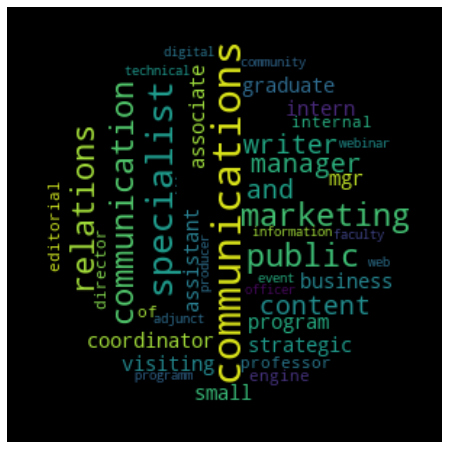

In [81]:
job_title_wordcloud(unique_posts)

#### Concept 1: Communication
To collect full data, the functions are redefined to collect the maximum amount of data. This takes some time.

Given the results of the test case, the terms professor, visiting, faculty, and adjunct suggest the query is pulling in job calls for university faculty, which is not a viable option (yet) for the graduates of this program.

In [10]:
def create_urls(query, exclusion, city_list, num_pages):
    urls = []
    stem = 'https://www.indeed.com/jobs?q='
    query = 'Master%27s+Degree+{}'.format(query)
    exclusions = '&as_not={}'.format(exclusion)
    params = '&radius=100&jt=fulltime&sr=directhire&sort=date&filter=0&fromage=any&limit=50&psf=advsrch&from=advancedsearch'
    for c in city_list:
        location = '&l={}'.format(c)
        for s in range(0, 10*num_pages, 10):
            start = '&start={}'.format(s)
            url = stem+query+exclusions+location+params+start
            urls.append(url)
    return urls

In [11]:
def indeed_scraper(query, exclusions):
    data = pd.DataFrame()
    urls = create_urls(query, exclusions, locations, 4)
    data = data.append(collect_data(urls), ignore_index = True)
    return data

In [85]:
comm_no_fac = indeed_scraper('communication', 'faculty')

In [86]:
len(comm_no_fac.index)

163

In [104]:
comm_no_fac.tail(10)

,job_title,company,link,job_location,description
153,Senior Regulatory Writer,Camargo Pharmaceutical Services,https://www.indeed.com/rc/clk?jk=14dbac2436ebf...,"Cincinnati, OH",[Camargo Pharmaceutical Services is excited to...
154,QA Technical Writer,Vedainfo INC,https://www.indeed.com/company/Computech-Corpo...,"Athens, OH","[Hi,Greetings...!My name is Ilyas. I am a Staf..."
155,Communications Manager,"LADD, Inc.",https://www.indeed.com/rc/clk?jk=f2847fdeee776...,"Cincinnati, OH",[Do you believe all people have ability and va...
156,Senior Technical Writer and Document Managemen...,MAG Areospace,https://www.indeed.com/rc/clk?jk=31911c6b134a1...,"Wright-Patterson AFB, OH",[Position Summary:\n\nMAG Aerospace is seeking...
157,"Director, CRM & Direct to Customer Communications",American Freight Furniture And Mattress,https://www.indeed.com/rc/clk?jk=8c31d509cff5c...,"Delaware, OH",[The purpose of this role is to identify custo...
158,Senior Technical Writer and Document Managemen...,MAG Aerospace,https://www.indeed.com/rc/clk?jk=3bd20c4d44f8f...,"Wright-Patterson AFB, OH",[Position Summary\nMAG Aerospace is seeking a ...
159,"Senior Strategist, Associate Communications",Bon Secours Mercy Health,https://www.indeed.com/rc/clk?jk=a794059dd834b...,"Cincinnati, OH",[Thank you for considering a career at Bon Sec...
160,Senior Social Media Consultant - UC Health 320...,UC Health,https://www.indeed.com/rc/clk?jk=a8023bf568b52...,"Cincinnati, OH",[Senior Social Media Consultant - UC Health 32...
161,Marketing Manager (Service Lines) - UC Health ...,UC Health,https://www.indeed.com/rc/clk?jk=c03afbbd1b880...,"Cincinnati, OH",[Marketing Manager (Service Lines) - UC Health...
162,Public Affairs Specialist,US Department of the Air Force,https://www.indeed.com/rc/clk?jk=d5da56d7997f5...,"Wright-Patterson AFB, OH",[]


In [109]:
comm_no_fac['description'] = [x[0] if len(x) > 0 else "NaN" for x in comm_no_fac['description']]

In [112]:
u_comm_no_fac = comm_no_fac.drop_duplicates(['job_title', 'company', 'job_location', 'description'])
len(u_comm_no_fac.index)

40

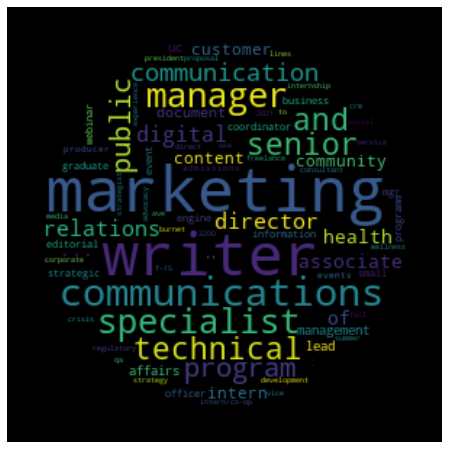

In [114]:
job_title_wordcloud(u_comm_no_fac)

Although "intern" is showing up here, which may not be the goal for a candidate holding an MA, the 40 jobs found seem mostly relevant and represent a small enough set to use for a systematic analysis.

#### Concept 2: Media
We start with no exclusions and the query 'media' for the next concepts.

In [13]:
media = indeed_scraper('media', '')

In [14]:
len(media.index)

272

In [15]:
media.head(10)

,job_title,company,link,job_location,description
0,Exceptional Student Education - Teacher Consul...,DPSCD,https://www.indeed.com/rc/clk?jk=e006684b58af9...,"Detroit, MI",[Job Title\nPosition Title: Exceptional Studen...
1,Public Relations Specialist,"HDC Contracting, LLC",https://www.indeed.com/company/HDC-Contracting...,"Warren, MI",[HDC Contracting is seeking a Public Relations...
2,Electromagnetic Compatibility (EMC) Engineer,Aptiv,https://www.indeed.com/rc/clk?jk=1ec5d3f194666...,"Warren, OH",[SHAPE THE FUTURE OF MOBILITY FROM DAY ONE.\nT...
3,"Associate Director, Consumer Insights",VMLY&R,https://www.indeed.com/rc/clk?jk=89aae3522b845...,"Detroit, MI","[At VMLY&R, we create connected brands. We res..."
4,Electronic Test System Development Engineer,Aptiv,https://www.indeed.com/rc/clk?jk=7a2b1f44755a2...,"Warren, OH",[SHAPE THE FUTURE OF MOBILITY FROM DAY ONE.\nT...
5,Central - Detroit - Tax Staff - Winter 2022,Ernst & Young,https://www.indeed.com/rc/clk?jk=f6f2946ad828c...,"Detroit, MI","[To submit your EY application, you must compl..."
6,Operations Manager,Hunger Network,https://www.indeed.com/company/Hunger-Network-...,"Cleveland, OH","[Operations Manager Hunger Network, a non-prof..."
7,"Marketing Account Manager - USA Insulation, Cl...",HS Group Holding Company,https://www.indeed.com/rc/clk?jk=a356bf407e5f2...,"Cleveland, OH","[MARKETING ACCOUNT MANAGER, USA INSULATION\nPO..."
8,"Director, Digital Marketing Services",Cleveland Clinic,https://www.indeed.com/rc/clk?jk=9f756700eb70f...,"Beachwood, OH","[Responsibilities:\nOrganizes, plans and direc..."
9,Director of Operations,Visiting Angels of Canton,https://www.indeed.com/rc/clk?jk=3629c4a9635aa...,"Canton, OH",[We are seeking a self-driven and highly compe...


In [16]:
media['description'] = [x[0] if len(x) > 0 else "NaN" for x in media['description']]
u_media = media.drop_duplicates(['job_title', 'company', 'job_location', 'description'])
len(u_media.index)

188

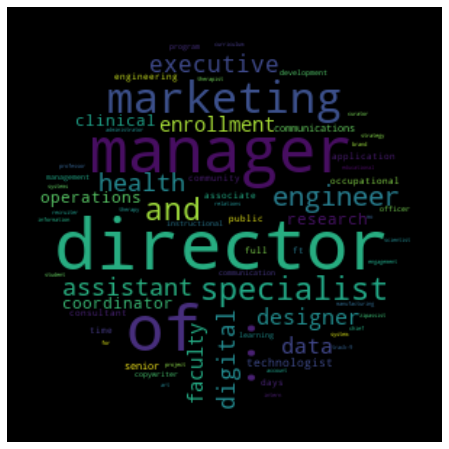

In [17]:
job_title_wordcloud(u_media)

#### Concept 3: Advocacy

In [12]:
advocacy = indeed_scraper('advocacy', '')

In [13]:
len(advocacy.index)

160

In [14]:
advocacy.head(10)

,job_title,company,link,job_location,description
0,Case Manager,MACOMB COUNTY COMMUNITY MENTAL HEALTH,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Clinton Township, MI","[JOB SUMMARY: Under direction, provides direc..."
1,Senior Product Management Analyst - Remote,Auto Club Group,https://www.indeed.com/rc/clk?jk=654c324c28e8b...,"Dearborn, MI",[Job Description\nSenior Product Management An...
2,Service & Support Specialist,Lucas County,https://www.indeed.com/rc/clk?jk=85b5b58fcc9d1...,"Toledo, OH",[I. TITLE: SERVICE & SUPPORT SPECIALIST\n CODE...
3,Regional Director of Trust Practice Management,KeyBank,https://www.indeed.com/rc/clk?jk=d8614e5604016...,"Cleveland, OH","[Location:\n127 Public Square - Cleveland, Ohi..."
4,Forensic Case Manager (Mental Health),"Empowering Integrated Care Solutions, LLC",https://www.indeed.com/company/Empowering-Inte...,"Beachwood, OH",[]
5,Supervisory Assistant Actuary,Auto Club Group,https://www.indeed.com/rc/clk?jk=cd006beca9f6c...,"Dearborn, MI",[Job Description\nSupervisor Assistant Actuary...
6,Wellbeing Coordinator,VirginPulse,https://www.indeed.com/rc/clk?jk=d12fb64283fc0...,"Detroit, MI",[Overview:\n\nWho is Virgin Pulse?\nVirgin Pul...
7,Clinical Counselor/Social Worker,WomenSafe,https://www.indeed.com/rc/clk?jk=cb8e4097ca016...,"Chardon, OH",[WomenSafe is looking to add Full-Time Clinica...
8,Neonatal Nurse Practitioner - Mercy Toledo Chi...,Nationwide Children's Hospital,https://www.indeed.com/rc/clk?jk=24c139d9ee7f1...,"Toledo, OH","[Overview:\nFULL TIME\n1.0FTE, 40 hours per we..."
9,"Social Worker, FT, Behavioral Health",Visiting Nurse Association of Ohio,https://www.indeed.com/rc/clk?jk=bb9c3ccbddc0f...,"Cleveland, OH",[Overview:\n\nAt Visiting Nurse Association of...


In [15]:
advocacy['description'] = [x[0] if len(x) > 0 else "NaN" for x in advocacy['description']]
u_advocacy = advocacy.drop_duplicates(['job_title', 'company', 'job_location', 'description'])
len(u_advocacy.index)

123

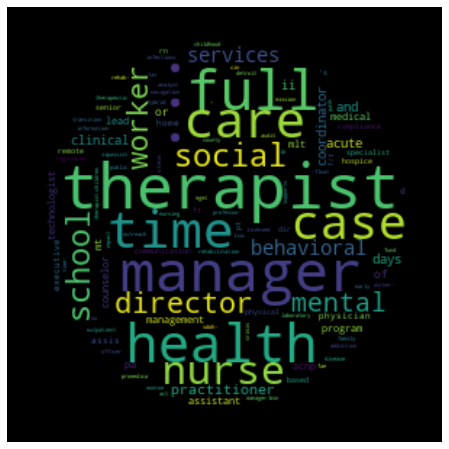

In [19]:
job_title_wordcloud(u_advocacy)

These job titles are showing positions more related to clinical psychology, social work, and healthcare professionals. I think the 'advocacy' term could pivot between social advocacy and health advocacy. However, some of these jobs are not in that space, so some terms will be excluded in the next iteration.

In [21]:
advocacy_no_clin_health = indeed_scraper('advocacy', 'clinical+therapy+"social%20work"+nurse')

In [22]:
len(advocacy_no_clin_health.index)

269

In [23]:
advocacy_no_clin_health.head(10)

,job_title,company,link,job_location,description
0,Full-Time Math Instructor - General Education ...,Hondros College of Nursing,https://www.indeed.com/rc/clk?cmp=hr%40hondros...,"Independence, OH",[Hondros College of Nursing is seeking General...
1,Senior Product Management Analyst - Remote,Auto Club Group,https://www.indeed.com/rc/clk?jk=654c324c28e8b...,"Dearborn, MI",[Job Description\nSenior Product Management An...
2,Regional Director of Trust Practice Management,KeyBank,https://www.indeed.com/rc/clk?jk=d8614e5604016...,"Cleveland, OH","[Location:\n127 Public Square - Cleveland, Ohi..."
3,Supervisory Assistant Actuary,Auto Club Group,https://www.indeed.com/rc/clk?jk=cd006beca9f6c...,"Dearborn, MI",[Job Description\nSupervisor Assistant Actuary...
4,Assistant Principal,Baden Academy Charter School,https://www.indeed.com/company/Baden-Academy-C...,"Baden, PA",[JOB GOAL: The Assistant Principal is responsi...
5,Client Services Coordinator,Journey Center for Safety and Healing,https://www.indeed.com/rc/clk?jk=9609bee2d6d9c...,"Cleveland, OH",[Journey Center for Safety and Healing (former...
6,Orientation and Mobility Instructor - Part or ...,Cleveland Sight Center,https://www.indeed.com/rc/clk?jk=3b84862ecab67...,"Cleveland, OH",[Are you an Orientation and Mobility Specialis...
7,Data Analytics Lead - Audit,Auto Club Group,https://www.indeed.com/rc/clk?jk=529a6f0bcf3db...,"Dearborn, MI",[Job Description\nData Analytics Lead-Audits –...
8,"Assistant Director, ZipAssist",University of Akron,https://www.indeed.com/rc/clk?jk=1ee955e24c5cd...,"Akron, OH",[Application Instructions\n\nTo apply for this...
9,Head of Fixed Income Investments,Auto Club Group,https://www.indeed.com/rc/clk?jk=70ca0d05496ea...,"Dearborn, MI",[Job Description\nHead of Fixed Income Investm...


In [24]:
advocacy_no_clin_health['description'] = [x[0] if len(x) > 0 else "NaN" for x in advocacy_no_clin_health['description']]
u_advocacy_no_clin_health = advocacy_no_clin_health.drop_duplicates(['job_title', 'company', 'job_location', 'description'])
len(u_advocacy_no_clin_health.index)

117

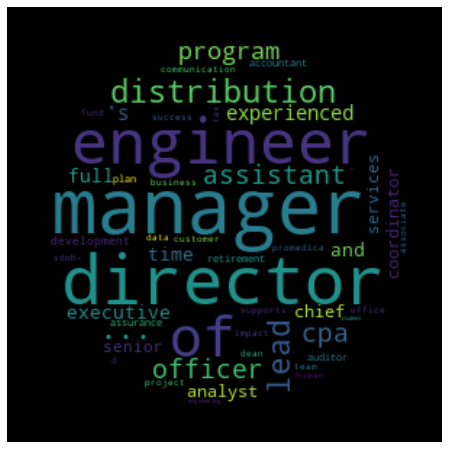

In [25]:
job_title_wordcloud(u_advocacy_no_clin_health)

In [30]:
u_advocacy_no_clin_health.head(10)

,job_title,company,link,job_location,description,title_lower,title_tokens,title_no_punct,title_freqs
0,Full-Time Math Instructor - General Education ...,Hondros College of Nursing,https://www.indeed.com/rc/clk?cmp=hr%40hondros...,"Independence, OH",Hondros College of Nursing is seeking General ...,full-time math instructor - general education ...,"[full-time, math, instructor, -, general, educ...","[full-time, math, instructor, general, educati...","{'full-time': 1, 'math': 1, 'instructor': 1, '..."
1,Senior Product Management Analyst - Remote,Auto Club Group,https://www.indeed.com/rc/clk?jk=654c324c28e8b...,"Dearborn, MI",Job Description\nSenior Product Management Ana...,senior product management analyst - remote,"[senior, product, management, analyst, -, remote]","[senior, product, management, analyst, remote]","{'senior': 1, 'product': 1, 'management': 1, '..."
2,Regional Director of Trust Practice Management,KeyBank,https://www.indeed.com/rc/clk?jk=d8614e5604016...,"Cleveland, OH","Location:\n127 Public Square - Cleveland, Ohio...",regional director of trust practice management,"[regional, director, of, trust, practice, mana...","[regional, director, of, trust, practice, mana...","{'regional': 1, 'director': 1, 'of': 1, 'trust..."
3,Supervisory Assistant Actuary,Auto Club Group,https://www.indeed.com/rc/clk?jk=cd006beca9f6c...,"Dearborn, MI",Job Description\nSupervisor Assistant Actuary ...,supervisory assistant actuary,"[supervisory, assistant, actuary]","[supervisory, assistant, actuary]","{'supervisory': 1, 'assistant': 1, 'actuary': 1}"
4,Assistant Principal,Baden Academy Charter School,https://www.indeed.com/company/Baden-Academy-C...,"Baden, PA",JOB GOAL: The Assistant Principal is responsib...,assistant principal,"[assistant, principal]","[assistant, principal]","{'assistant': 1, 'principal': 1}"
5,Client Services Coordinator,Journey Center for Safety and Healing,https://www.indeed.com/rc/clk?jk=9609bee2d6d9c...,"Cleveland, OH",Journey Center for Safety and Healing (formerl...,client services coordinator,"[client, services, coordinator]","[client, services, coordinator]","{'client': 1, 'services': 1, 'coordinator': 1}"
6,Orientation and Mobility Instructor - Part or ...,Cleveland Sight Center,https://www.indeed.com/rc/clk?jk=3b84862ecab67...,"Cleveland, OH",Are you an Orientation and Mobility Specialist...,orientation and mobility instructor - part or ...,"[orientation, and, mobility, instructor, -, pa...","[orientation, and, mobility, instructor, part,...","{'orientation': 1, 'and': 1, 'mobility': 1, 'i..."
7,Data Analytics Lead - Audit,Auto Club Group,https://www.indeed.com/rc/clk?jk=529a6f0bcf3db...,"Dearborn, MI",Job Description\nData Analytics Lead-Audits – ...,data analytics lead - audit,"[data, analytics, lead, -, audit]","[data, analytics, lead, audit]","{'data': 1, 'analytics': 1, 'lead': 1, 'audit'..."
8,"Assistant Director, ZipAssist",University of Akron,https://www.indeed.com/rc/clk?jk=1ee955e24c5cd...,"Akron, OH",Application Instructions\n\nTo apply for this ...,"assistant director, zipassist","[assistant, director, ,, zipassist]","[assistant, director, zipassist]","{'assistant': 1, 'director': 1, 'zipassist': 1}"
9,Head of Fixed Income Investments,Auto Club Group,https://www.indeed.com/rc/clk?jk=70ca0d05496ea...,"Dearborn, MI",Job Description\nHead of Fixed Income Investme...,head of fixed income investments,"[head, of, fixed, income, investments]","[head, of, fixed, income, investments]","{'head': 1, 'of': 1, 'fixed': 1, 'income': 1, ..."


In [33]:
#ux_advocacy_no_clin_health = advocacy_no_clin_health.drop_duplicates(['job_title', 'company', 'job_location'])
#len(ux_advocacy_no_clin_health.index)

In [34]:
#job_title_wordcloud(ux_advocacy_no_clin_health)

In [35]:
u_advocacy_no_clin_health.to_csv('u_advocacy_no_clin_health.csv')

#### Systematic Analysis

And this is as far as I have made so far...

In [31]:
#test_url_list = ['https://www.indeed.com/jobs?q=Master%27s+Degree+Communication+-faculty&l=Cleveland,+OH&radius=100&jt=fulltime&filter=0&start=0']
#data = collect_data(test_url_list)

In [32]:
#data['description'][0][0]

##### Prepared for the Ad hoc Grad Program Committee of Kent State's College of Communication and Information
###### By [David E. Silva](https://github.com/dataesilva) - dsilva2@kent.edu